# Step 1: Install Libraries

In [1]:
!pip install matplotlib seaborn

# Step 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np

import math

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Get Dataset Pandas Frame

In [3]:
train_set_url = "https://raw.githubusercontent.com/AsadiAhmad/Loan-Prediction-SVM/refs/heads/main/Dataset/train.csv"
test_set_url = "https://raw.githubusercontent.com/AsadiAhmad/Loan-Prediction-SVM/refs/heads/main/Dataset/test.csv"

pd.set_option('display.max_rows', None)

train_set = pd.read_csv(train_set_url)
test_set = pd.read_csv(test_set_url)

In [4]:
train_set.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,75256,4260981,47,18,single,rented,no,Politician,Hindupur,Andhra_Pradesh,7,13,0
1,192436,8529345,44,2,single,rented,no,Computer_hardware_engineer,Narasaraopet,Andhra_Pradesh,2,10,0
2,154840,7848654,55,9,single,rented,no,Software_Developer,Patna,Bihar,9,13,0
3,59775,8491491,61,20,single,rented,no,Comedian,Haldia,West_Bengal,8,11,0
4,63789,1537266,78,13,single,rented,no,Web_designer,Coimbatore,Tamil_Nadu,9,12,0
5,239303,4716686,74,11,single,norent_noown,no,Analyst,Firozabad,Uttar_Pradesh,9,10,0
6,235589,8631544,69,13,married,rented,no,Graphic_Designer,Solapur,Maharashtra,13,12,0
7,102872,6947233,62,10,single,rented,no,Technical_writer,Bidar,Karnataka,10,12,0
8,235463,3359719,49,13,single,rented,no,Fashion_Designer,Korba,Chhattisgarh,13,14,0
9,170788,961937,57,13,single,rented,no,Graphic_Designer,Avadi,Tamil_Nadu,5,10,0


# Step 4: Preprocessing

## Transform discrete columns to numeric data

In [5]:
def transform_binary_columns(dataset):
    married_mapping = {'married': 1, 'single': 0}
    house_mapping = {'owned': 1, 'rented': 0.5, 'norent_noown': 0}
    car_mapping = {'yes': 1, 'no': 0}

    dataset['Married/Single'] = dataset['Married/Single'].map(married_mapping)
    dataset['House_Ownership'] = dataset['House_Ownership'].map(house_mapping)
    dataset['Car_Ownership'] = dataset['Car_Ownership'].map(car_mapping)

    return dataset

In [6]:
train_set_transformed = transform_binary_columns(train_set)
test_set_transformed = transform_binary_columns(test_set)

In [7]:
train_set_transformed.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,75256,4260981,47,18,0,0.5,0,Politician,Hindupur,Andhra_Pradesh,7,13,0
1,192436,8529345,44,2,0,0.5,0,Computer_hardware_engineer,Narasaraopet,Andhra_Pradesh,2,10,0
2,154840,7848654,55,9,0,0.5,0,Software_Developer,Patna,Bihar,9,13,0
3,59775,8491491,61,20,0,0.5,0,Comedian,Haldia,West_Bengal,8,11,0
4,63789,1537266,78,13,0,0.5,0,Web_designer,Coimbatore,Tamil_Nadu,9,12,0
5,239303,4716686,74,11,0,0.0,0,Analyst,Firozabad,Uttar_Pradesh,9,10,0
6,235589,8631544,69,13,1,0.5,0,Graphic_Designer,Solapur,Maharashtra,13,12,0
7,102872,6947233,62,10,0,0.5,0,Technical_writer,Bidar,Karnataka,10,12,0
8,235463,3359719,49,13,0,0.5,0,Fashion_Designer,Korba,Chhattisgarh,13,14,0
9,170788,961937,57,13,0,0.5,0,Graphic_Designer,Avadi,Tamil_Nadu,5,10,0


## One Hut encoding

In [8]:
def one_hot_encoding(dataset, columns):
    new_columns = []
    for col in columns:
        unique_values = dataset[col].unique()
        for value in unique_values:
            new_col_name = f"{col}-{value}"
            new_columns.append((new_col_name, (dataset[col] == value).astype(int)))
    new_columns_df = pd.DataFrame(dict(new_columns))
    dataset = pd.concat([dataset, new_columns_df], axis=1)

    return dataset.drop(columns, axis=1)

In [9]:
train_set_one_hut = one_hot_encoding(train_set_transformed, ['Profession', 'CITY', 'STATE'])
test_set_one_hut = one_hot_encoding(test_set_transformed, ['Profession', 'CITY', 'STATE'])

In [10]:
train_set_one_hut.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,...,STATE-Delhi,STATE-Tripura,STATE-Jammu_and_Kashmir,STATE-Manipur,STATE-Uttarakhand,STATE-Uttar_Pradesh[5],STATE-Puducherry,STATE-Himachal_Pradesh,STATE-Chandigarh,STATE-Sikkim
0,75256,4260981,47,18,0,0.5,0,7,13,0,...,0,0,0,0,0,0,0,0,0,0
1,192436,8529345,44,2,0,0.5,0,2,10,0,...,0,0,0,0,0,0,0,0,0,0
2,154840,7848654,55,9,0,0.5,0,9,13,0,...,0,0,0,0,0,0,0,0,0,0
3,59775,8491491,61,20,0,0.5,0,8,11,0,...,0,0,0,0,0,0,0,0,0,0
4,63789,1537266,78,13,0,0.5,0,9,12,0,...,0,0,0,0,0,0,0,0,0,0
5,239303,4716686,74,11,0,0.0,0,9,10,0,...,0,0,0,0,0,0,0,0,0,0
6,235589,8631544,69,13,1,0.5,0,13,12,0,...,0,0,0,0,0,0,0,0,0,0
7,102872,6947233,62,10,0,0.5,0,10,12,0,...,0,0,0,0,0,0,0,0,0,0
8,235463,3359719,49,13,0,0.5,0,13,14,0,...,0,0,0,0,0,0,0,0,0,0
9,170788,961937,57,13,0,0.5,0,5,10,0,...,0,0,0,0,0,0,0,0,0,0


## Normalizing min max

In [11]:
def min_max_normalize(train_set, test_set, columns):
    min_values = train_set[columns].min()
    max_values = train_set[columns].max()

    train_set_normalized = train_set.copy()
    train_set_normalized[columns] = (train_set[columns] - min_values) / (max_values - min_values)

    test_set_normalized = test_set.copy()
    test_set_normalized[columns] = (test_set[columns] - min_values) / (max_values - min_values)

    return train_set_normalized, test_set_normalized

In [12]:
columns_to_normalize = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]
train_set_normal, test_set_normal = min_max_normalize(train_set_one_hut, test_set_one_hut, columns_to_normalize)

In [13]:
train_set_normal.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,...,STATE-Delhi,STATE-Tripura,STATE-Jammu_and_Kashmir,STATE-Manipur,STATE-Uttarakhand,STATE-Uttar_Pradesh[5],STATE-Puducherry,STATE-Himachal_Pradesh,STATE-Chandigarh,STATE-Sikkim
0,75256,0.425508,0.448276,0.90,0,0.5,0,0.500000,0.75,0,...,0,0,0,0,0,0,0,0,0,0
1,192436,0.852788,0.396552,0.10,0,0.5,0,0.142857,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2,154840,0.784648,0.586207,0.45,0,0.5,0,0.642857,0.75,0,...,0,0,0,0,0,0,0,0,0,0
3,59775,0.848999,0.689655,1.00,0,0.5,0,0.571429,0.25,0,...,0,0,0,0,0,0,0,0,0,0
4,63789,0.152854,0.982759,0.65,0,0.5,0,0.642857,0.50,0,...,0,0,0,0,0,0,0,0,0,0
5,239303,0.471126,0.913793,0.55,0,0.0,0,0.642857,0.00,0,...,0,0,0,0,0,0,0,0,0,0
6,235589,0.863019,0.827586,0.65,1,0.5,0,0.928571,0.50,0,...,0,0,0,0,0,0,0,0,0,0
7,102872,0.694413,0.706897,0.50,0,0.5,0,0.714286,0.50,0,...,0,0,0,0,0,0,0,0,0,0
8,235463,0.335289,0.482759,0.65,0,0.5,0,0.928571,1.00,0,...,0,0,0,0,0,0,0,0,0,0
9,170788,0.095262,0.620690,0.65,0,0.5,0,0.357143,0.00,0,...,0,0,0,0,0,0,0,0,0,0


## Remove unrelated features

In [14]:
train_set = train_set_normal.drop(["Id"], axis=1)
test_set = test_set_normal.drop(["Id"], axis=1)

## Move Target col to the End

In [15]:
train_set = train_set[[col for col in train_set.columns if col != "Risk_Flag"] + ["Risk_Flag"]]

In [16]:
train_set.head(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession-Politician,Profession-Computer_hardware_engineer,...,STATE-Tripura,STATE-Jammu_and_Kashmir,STATE-Manipur,STATE-Uttarakhand,STATE-Uttar_Pradesh[5],STATE-Puducherry,STATE-Himachal_Pradesh,STATE-Chandigarh,STATE-Sikkim,Risk_Flag
0,0.425508,0.448276,0.90,0,0.5,0,0.500000,0.75,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.852788,0.396552,0.10,0,0.5,0,0.142857,0.00,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.784648,0.586207,0.45,0,0.5,0,0.642857,0.75,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.848999,0.689655,1.00,0,0.5,0,0.571429,0.25,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.152854,0.982759,0.65,0,0.5,0,0.642857,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.471126,0.913793,0.55,0,0.0,0,0.642857,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.863019,0.827586,0.65,1,0.5,0,0.928571,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.694413,0.706897,0.50,0,0.5,0,0.714286,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.335289,0.482759,0.65,0,0.5,0,0.928571,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.095262,0.620690,0.65,0,0.5,0,0.357143,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 5: Feature Selection with MI Score

In [17]:
train_set_copy = train_set.copy()
features_train_selection = train_set_copy.drop(columns=['Risk_Flag'])
target_train_selection = train_set_copy['Risk_Flag']

mutual_info = mutual_info_classif(features_train_selection, target_train_selection)

mi_df = pd.DataFrame({
    'Feature': features_train_selection.columns,
    'Mutual Information': mutual_info
})

mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

In [18]:
selected_features = mi_df[mi_df['Mutual Information'] > 0.002]
selected_features

,Feature,Mutual Information
0,Income,0.159516
4,House_Ownership,0.024205
5,Car_Ownership,0.009337
7,CURRENT_HOUSE_YRS,0.007655
2,Experience,0.003407
380,STATE-Uttar_Pradesh,0.003329
6,CURRENT_JOB_YRS,0.003165
247,CITY-Nadiad,0.002270
167,CITY-Jodhpur,0.002180
1,Age,0.002119


In [19]:
selected_features_list = list(selected_features['Feature'])
selected_features_list

['Income',
 'House_Ownership',
 'Car_Ownership',
 'CURRENT_HOUSE_YRS',
 'Experience',
 'STATE-Uttar_Pradesh',
 'CURRENT_JOB_YRS',
 'CITY-Nadiad',
 'CITY-Jodhpur',
 'Age',
 'STATE-Maharashtra',
 'CITY-Bhatpara']

# Step 6: Split Dataset into Train and validation

In [20]:
train_set, validation_set = train_test_split(train_set, test_size=0.2, random_state=42)
train_set = train_set.reset_index(drop=True)
validation_set = validation_set.reset_index(drop=True)

# Step 7: Split Selected Features and Target Column

In [21]:
features_train = train_set[selected_features_list]
target_train = train_set['Risk_Flag']

features_validation = validation_set[selected_features_list]
target_validation = validation_set['Risk_Flag']

In [22]:
features_train.head(10)

,Income,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Experience,STATE-Uttar_Pradesh,CURRENT_JOB_YRS,CITY-Nadiad,CITY-Jodhpur,Age,STATE-Maharashtra,CITY-Bhatpara
0,0.017333,0.5,1,0.50,0.50,0,0.714286,0,0,0.931034,0,0
1,0.437000,1.0,0,0.00,0.15,0,0.214286,0,0,0.775862,0,0
2,0.344878,0.5,0,0.00,0.30,0,0.428571,0,0,0.224138,0,0
3,0.773961,1.0,1,0.50,0.45,0,0.642857,0,1,0.189655,0,0
4,0.789321,0.5,0,0.25,0.85,1,0.357143,0,0,0.224138,0,0
5,0.194295,0.5,0,1.00,0.60,0,0.857143,0,0,0.327586,0,0
6,0.494512,0.5,0,0.25,1.00,1,0.285714,0,0,0.775862,0,0
7,0.638631,0.5,0,0.25,0.80,0,0.500000,0,0,0.189655,0,0
8,0.723304,0.5,0,0.25,0.20,0,0.285714,0,0,0.431034,0,0
9,0.278327,0.5,1,0.50,0.90,0,0.714286,0,0,0.258621,0,0


# Step 8: Undersampling Train set

In [23]:
minority_class = features_train[target_train == 1]
majority_class = features_train[target_train == 0]

minority_class_size = len(minority_class)

majority_class_undersampled = majority_class.sample(n=minority_class_size, random_state=42)

features_train_sample = pd.concat([minority_class, majority_class_undersampled])
target_train_sample = pd.concat([target_train[target_train == 1], target_train[target_train == 0].sample(n=minority_class_size, random_state=42)])

features_train_sample = features_train_sample.sample(frac=1, random_state=42).reset_index(drop=True)
target_train_sample = target_train_sample.sample(frac=1, random_state=42).reset_index(drop=True)

In [24]:
print("Remaining rows :" + str(len(features_train_sample)))

Remaining rows :39690


# Step 9: Train SVM model with Selected Features

## Linear Kernel

In [25]:
model_linear = SVC(kernel='linear', class_weight='balanced')
model_linear.fit(features_train_sample, target_train_sample)
linear_predicted = model_linear.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, linear_predicted))
print("Classification Report:\n", classification_report(target_validation, linear_predicted))

Accuracy: 0.3611607142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.31      0.46     35343
           1       0.13      0.72      0.22      4977

    accuracy                           0.36     40320
   macro avg       0.51      0.51      0.34     40320
weighted avg       0.79      0.36      0.43     40320



## Poly Kernel

In [26]:
model_poly = SVC(kernel='poly', class_weight='balanced')
model_poly.fit(features_train_sample, target_train_sample)
poly_predicted = model_poly.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, poly_predicted))
print("Classification Report:\n", classification_report(target_validation, poly_predicted))

Accuracy: 0.46118551587301587
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.43      0.59     35343
           1       0.14      0.66      0.23      4977

    accuracy                           0.46     40320
   macro avg       0.52      0.54      0.41     40320
weighted avg       0.81      0.46      0.54     40320



## RBF Kernel

In [27]:
model_rbf = SVC(kernel='rbf', class_weight='balanced')
model_rbf.fit(features_train_sample, target_train_sample)
rbf_predicted = model_rbf.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, rbf_predicted))
print("Classification Report:\n", classification_report(target_validation, rbf_predicted))

Accuracy: 0.4820188492063492
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.45      0.61     35343
           1       0.15      0.67      0.24      4977

    accuracy                           0.48     40320
   macro avg       0.53      0.56      0.42     40320
weighted avg       0.81      0.48      0.56     40320



## Sigmoid Kernal

In [28]:
model_sigmoid = SVC(kernel='sigmoid', class_weight='balanced')
model_sigmoid.fit(features_train_sample, target_train_sample)
sigmoid_predicted = model_sigmoid.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, sigmoid_predicted))
print("Classification Report:\n", classification_report(target_validation, sigmoid_predicted))

Accuracy: 0.5173115079365079
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.65     35343
           1       0.13      0.52      0.21      4977

    accuracy                           0.52     40320
   macro avg       0.51      0.52      0.43     40320
weighted avg       0.79      0.52      0.60     40320



# Step 10: Finding optimized hyperparameters

## Initiate Param Grid

In [29]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

## Set low row dataset for find best hyper parameter

In [30]:
train_set_mini = train_set.sample(n=1000, random_state=42)
validation_set_mini = validation_set.sample(n=200, random_state=42)

features_train_mini = train_set_mini[selected_features_list]
target_train_mini = train_set_mini['Risk_Flag']

features_validation_mini = validation_set_mini[selected_features_list]
target_validation_mini = validation_set_mini['Risk_Flag']

## Linear Kernel

In [31]:
model_linear = SVC(kernel='linear', gamma='scale')
grid_search_linear = GridSearchCV(model_linear, param_grid, cv=5, scoring='f1', verbose=1)
grid_search_linear.fit(features_train_mini, target_train_mini)

print("Best C value:", grid_search_linear.best_params_['C'])
print("Best Training F-measure:", grid_search_linear.best_score_)

best_model_linear = grid_search_linear.best_estimator_
linear_predicted_mini = best_model_linear.predict(features_validation_mini)
linear_vaildation_accuracy_mini = accuracy_score(target_validation_mini, linear_predicted_mini)
print("Best Validation accuracy", linear_vaildation_accuracy_mini)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: 0.01
Best Training accuracy: 0.0
Best Validation accuracy 0.91


In [32]:
model_linear = SVC(kernel='linear', C=grid_search_linear.best_params_['C'])
model_linear.fit(features_train_sample, target_train_sample)
linear_predicted = model_linear.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, linear_predicted))
print("Classification Report:\n", classification_report(target_validation, linear_predicted))

Accuracy: 0.3595982142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.31      0.46     35343
           1       0.13      0.72      0.22      4977

    accuracy                           0.36     40320
   macro avg       0.51      0.51      0.34     40320
weighted avg       0.79      0.36      0.43     40320



## Poly Kernel

In [33]:
model_poly = SVC(kernel='poly', gamma='scale')
grid_search_poly = GridSearchCV(model_poly, param_grid, cv=5, scoring='f1', verbose=1)
grid_search_poly.fit(features_train_mini, target_train_mini)

print("Best C value:", grid_search_poly.best_params_['C'])
print("Best F-measure:", grid_search_poly.best_score_)

best_model_poly = grid_search_poly.best_estimator_
poly_predicted_mini = best_model_poly.predict(features_validation_mini)
poly_vaildation_accuracy_mini = accuracy_score(target_validation_mini, poly_predicted_mini)
print("Best Validation accuracy", poly_vaildation_accuracy_mini)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: 100
Best accuracy: 0.12913389242336612
Best Validation accuracy 0.875


In [34]:
model_poly = SVC(kernel='poly', C=grid_search_poly.best_params_['C'])
model_poly.fit(features_train_sample, target_train_sample)
poly_predicted = model_poly.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, poly_predicted))
print("Classification Report:\n", classification_report(target_validation, poly_predicted))

Accuracy: 0.4421130952380952
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.41      0.56     35343
           1       0.14      0.68      0.23      4977

    accuracy                           0.44     40320
   macro avg       0.52      0.55      0.40     40320
weighted avg       0.81      0.44      0.52     40320



## RBF Kernel

In [35]:
model_rbf = SVC(kernel='rbf', gamma='scale')
grid_search_rbf = GridSearchCV(model_rbf, param_grid, cv=5, scoring='f1', verbose=1)
grid_search_rbf.fit(features_train_mini, target_train_mini)

print("Best C value:", grid_search_rbf.best_params_['C'])
print("Best Training F-measure:", grid_search_rbf.best_score_)

best_model_rbf = grid_search_rbf.best_estimator_
rbf_predicted_mini = best_model_rbf.predict(features_validation_mini)
rbf_vaildation_accuracy_mini = accuracy_score(target_validation_mini, rbf_predicted_mini)
print("Best Validation accuracy", rbf_vaildation_accuracy_mini)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: 100
Best Training F-measure: 0.15118206305098467
Best Validation accuracy 0.845


In [36]:
model_rbf = SVC(kernel='rbf', C=grid_search_rbf.best_params_['C'])
model_rbf.fit(features_train_sample, target_train_sample)
rbf_predicted = model_rbf.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, rbf_predicted))
print("Classification Report:\n", classification_report(target_validation, rbf_predicted))

Accuracy: 0.5763392857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.56      0.70     35343
           1       0.18      0.68      0.28      4977

    accuracy                           0.58     40320
   macro avg       0.55      0.62      0.49     40320
weighted avg       0.83      0.58      0.65     40320



## Sigmoid Kernal

In [37]:
model_sigmoid = SVC(kernel='sigmoid', gamma='scale')
grid_search_sigmoid = GridSearchCV(model_sigmoid, param_grid, cv=5, scoring='f1', verbose=1)
grid_search_sigmoid.fit(features_train_mini, target_train_mini)

print("Best C value:", grid_search_sigmoid.best_params_['C'])
print("Best Training F-measure:", grid_search_sigmoid.best_score_)

best_model_sigmoid = grid_search_sigmoid.best_estimator_
sigmoid_predicted_mini = best_model_sigmoid.predict(features_validation_mini)
sigmoid_vaildation_accuracy_mini = accuracy_score(target_validation_mini, sigmoid_predicted_mini)
print("Best Validation accuracy", sigmoid_vaildation_accuracy_mini)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best C value: 10
Best Training F-measure: 0.09728345411627809
Best Validation accuracy 0.83


In [38]:
model_sigmoid = SVC(kernel='sigmoid', C=grid_search_sigmoid.best_params_['C'])
model_sigmoid.fit(features_train_sample, target_train_sample)
sigmoid_predicted = model_sigmoid.predict(features_validation)

print("Accuracy:", accuracy_score(target_validation, sigmoid_predicted))
print("Classification Report:\n", classification_report(target_validation, sigmoid_predicted))

Accuracy: 0.5198164682539682
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.65     35343
           1       0.13      0.52      0.21      4977

    accuracy                           0.52     40320
   macro avg       0.51      0.52      0.43     40320
weighted avg       0.79      0.52      0.60     40320



# Step 11: Calculate Confusion Matrix

## Core functions

In [39]:
def calculate_confusion_matrix(target_list, predicted_list):
    target_array = np.array(target_list)
    predicted_array = np.array(predicted_list)

    if target_array.shape[0] != predicted_array.shape[0]:
        raise ValueError("target_list and predicted_list must have the same length.")

    TP = ((target_array == 1) & (predicted_array == 1)).sum()
    FN = ((target_array == 1) & (predicted_array == 0)).sum()
    FP = ((target_array == 0) & (predicted_array == 1)).sum()
    TN = ((target_array == 0) & (predicted_array == 0)).sum()

    return TP, FN, FP, TN

In [40]:
def show_confusion_matrix(tp, fn, fp, tn):
    conf_matrix = np.array([[tp, fn], [fp, tn]])
    fig, ax = plt.subplots()

    cax = ax.matshow(conf_matrix, cmap='Blues')

    plt.colorbar(cax)

    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

    ax.set_xticklabels(['Predicted Positive', 'Predicted Negative'])
    ax.set_yticklabels(['Actual Positive', 'Actual Negative'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('2x2 Confusion Matrix')

    plt.show()

## Linear Kernel

In [41]:
tp_linear, fn_linear, fp_linear, tn_linear = calculate_confusion_matrix(target_validation, linear_predicted)

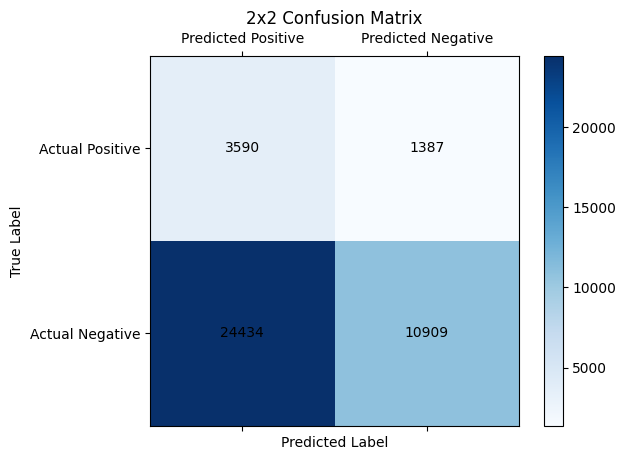

In [42]:
show_confusion_matrix(tp_linear, fn_linear, fp_linear, tn_linear)

## Poly Kernel

In [43]:
tp_poly, fn_poly, fp_poly, tn_poly = calculate_confusion_matrix(target_validation, poly_predicted)

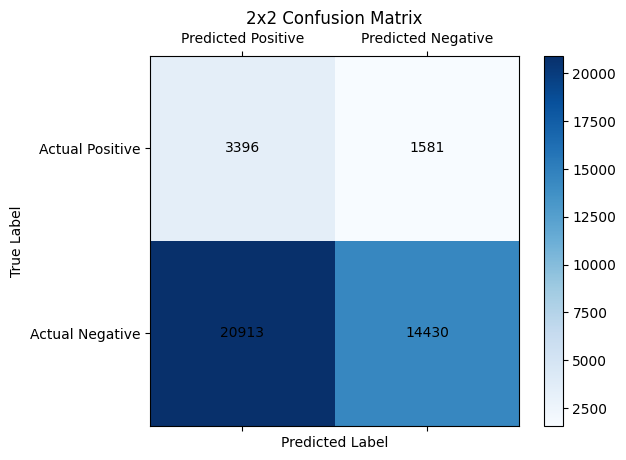

In [44]:
show_confusion_matrix(tp_poly, fn_poly, fp_poly, tn_poly)

## RBF Kernel

In [45]:
tp_rbf, fn_rbf, fp_rbf, tn_rbf = calculate_confusion_matrix(target_validation, rbf_predicted)

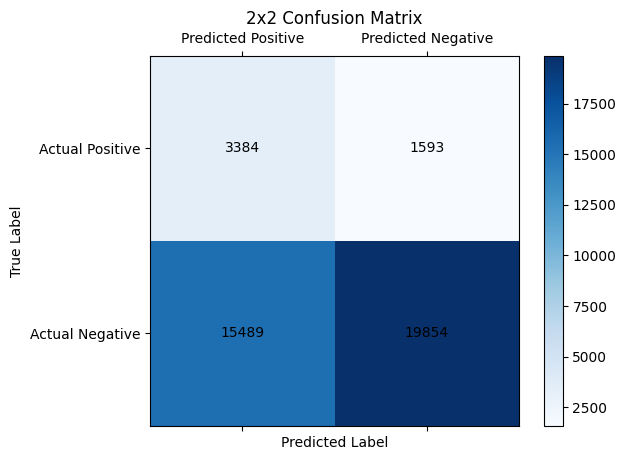

In [46]:
show_confusion_matrix(tp_rbf, fn_rbf, fp_rbf, tn_rbf)

## Sigmoid Kernal

In [47]:
tp_sigmoid, fn_sigmoid, fp_sigmoid, tn_sigmoid = calculate_confusion_matrix(target_validation, sigmoid_predicted)

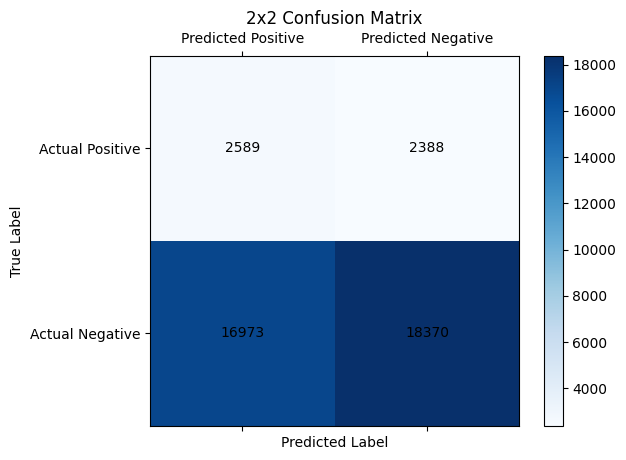

In [48]:
show_confusion_matrix(tp_sigmoid, fn_sigmoid, fp_sigmoid, tn_sigmoid)

# Step 12:  Calculate Measurements

## Core function

In [49]:
def calculate_measurements(tp, fn, fp, tn):
    precision = tp / (tp + fp) if tp + fp != 0 else 0
    recall = tp / (tp + fn) if tp + fn != 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn) if tp + tn + fp + fn != 0 else 0
    f_measure = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

    precision *= 100
    recall *= 100
    accuracy *= 100
    f_measure *= 100

    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"F-Measure (F1 Score): {f_measure:.2f}%")
    return precision, recall, accuracy, f_measure

## Linear Kernel

In [50]:
calculate_measurements(tp_linear, fn_linear, fp_linear, tn_linear)

Precision: 12.81%
Recall: 72.13%
Accuracy: 35.96%
F-Measure (F1 Score): 21.76%


(12.810448187268056, 72.1318063090215, 35.95982142857143, 21.756916457077057)

## Poly Kernel

In [51]:
calculate_measurements(tp_poly, fn_poly, fp_poly, tn_poly)

Precision: 13.97%
Recall: 68.23%
Accuracy: 44.21%
F-Measure (F1 Score): 23.19%


(13.970134518079725, 68.23387582881254, 44.211309523809526, 23.191968858840404)

## RBF Kernel

In [52]:
calculate_measurements(tp_rbf, fn_rbf, fp_rbf, tn_rbf)

Precision: 17.93%
Recall: 67.99%
Accuracy: 57.63%
F-Measure (F1 Score): 28.38%


(17.93037672865999, 67.99276672694394, 57.63392857142857, 28.37735849056604)

## Sigmoid Kernal

In [53]:
calculate_measurements(tp_sigmoid, fn_sigmoid, fp_sigmoid, tn_sigmoid)

Precision: 13.23%
Recall: 52.02%
Accuracy: 51.98%
F-Measure (F1 Score): 21.10%


(13.234843063081483, 52.01928872814949, 51.98164682539682, 21.10110436448103)

# Step 13: Calculate Test set with best model

In [55]:
features_test = test_set[selected_features_list]

best_model = model_rbf

predicted = best_model.predict(features_test)
test_set['Risk_Flag'] = predicted

# Step 14: Export the predicted EXCEL

In [57]:
test_set.to_csv('predictions1.csv', index=False)